<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Algoritmy_klasterizacii/DZ_Kondratev_Algoritmy_klasterizacii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции «Алгоритмы кластеризации»

**Преподаватель**: Даниил Корбут, Наталья Баданина, Иван Анисковец, Юлия Пономарева

**Задание**

**Цель:**
Изучить применение моделей кластеризации

**Описание задания:**

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

- a) Для отображения картинки воспользуйтесь вспомогательной функцией:
  - import matplotlib.pyplot as plt
  - import cv2
  - import skimage
  - def draw_picture(image, title, bgr=False):

  - b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB

  - new_image = cv2.merge([r, g, b])
  - plt.figure(figsize=(7, 5))
  - plt.axis(‘off’)
  - plt.imshow(new_image)
  - plt.title(title)
  - plt.show()

- b) Для загрузки картинки можно использовать код:

  - img = cv.imread(path)

2. Реализуйте три модели кластеризации:

- a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

- b) DBSCAN

- c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
Сформулируйте выводы по проделанной работе.

- a) Какая модель показала лучший результат?




# 1. Загрузка и отображение изображения:

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim
import requests
from io import BytesIO
import pandas as pd

# Функция для отображения изображения
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image)
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

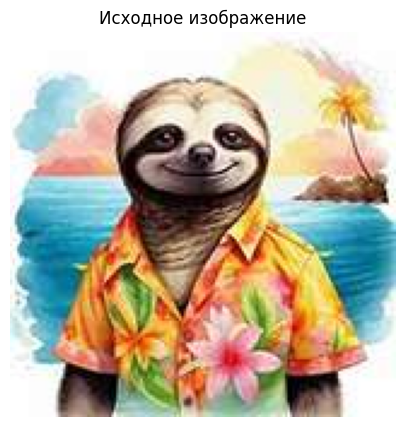

In [13]:
# URL изображения
url = 'https://github.com/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Algoritmy_klasterizacii/pandas_11zon_11zon%20(1)_11zon%20(1)_11zon.jpg?raw=true'

# Загрузка изображения по URL
response = requests.get(url)
img = cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_COLOR)

# Отображение исходного изображения
draw_picture(img, 'Исходное изображение')

# 2. Реализация моделей кластеризации:

KMeans кластеризация

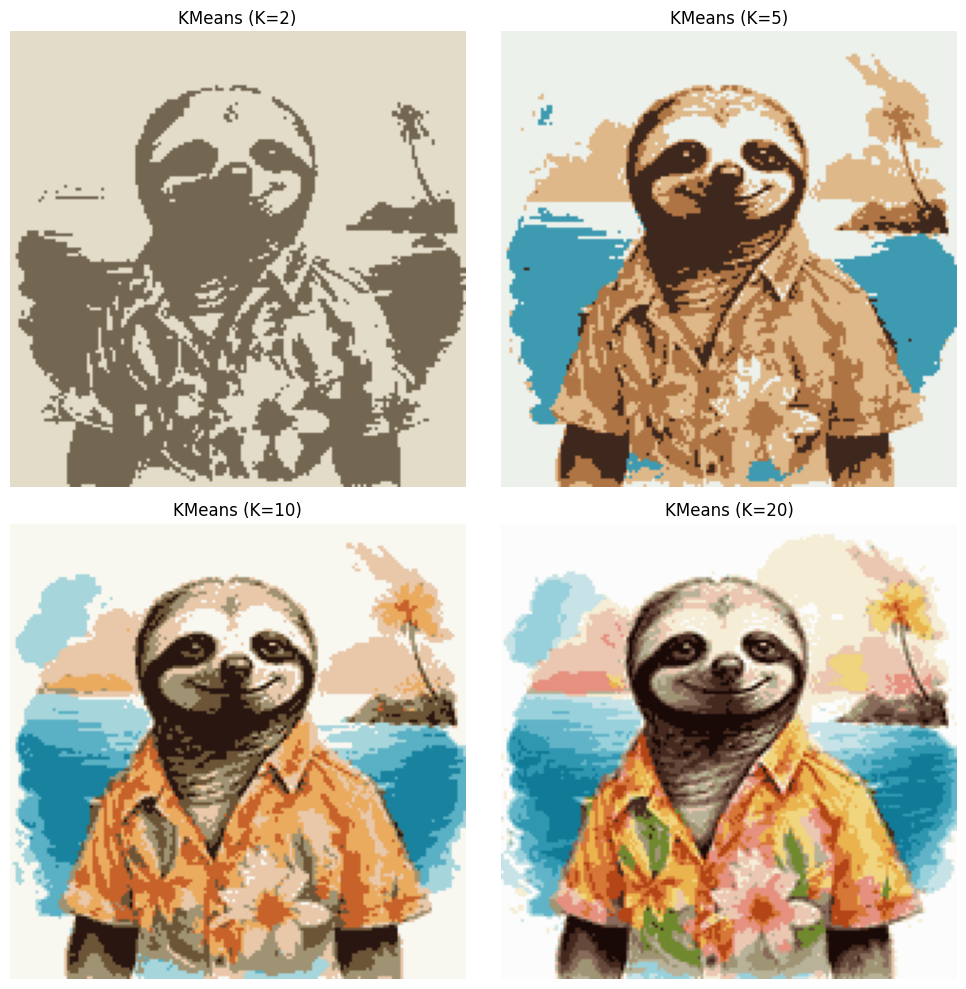

In [14]:
# Подготовка данных для кластеризации
pixels = img.reshape((-1, 3))

# Создание DataFrame для хранения результатов SSIM
results_df = pd.DataFrame(columns=['Model', 'Parameters', 'SSIM'])

# Функция для применения KMeans и вычисления SSIM
def apply_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    centroids = kmeans.cluster_centers_
    quantized = centroids[labels].reshape(img.shape).astype('uint8')
    ssim_value = ssim(img, quantized, channel_axis=2)
    results_df.loc[len(results_df)] = ['KMeans', f'K={n_clusters}', ssim_value]
    return quantized

# Применение KMeans с разным числом кластеров
k_values = [2, 5, 10, 20]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, k in enumerate(k_values):
    quantized = apply_kmeans(k)
    axs[i].imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'KMeans (K={k})')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [15]:
# Вывод таблицы результатов
print(results_df)

    Model Parameters      SSIM
0  KMeans        K=2  0.524046
1  KMeans        K=5  0.671976
2  KMeans       K=10  0.775495
3  KMeans       K=20  0.849081


Выбор оптимального числа кластеров:
   - Выбор оптимального числа кластеров зависит от конкретной задачи и требований к качеству кластеризации.
   - Если приоритетом является высокое структурное сходство с исходным изображением, то можно выбрать большее число кластеров (например, K = 20), чтобы получить более детализированное и точное представление изображения.
   - Однако, увеличение числа кластеров также может привести к увеличению вычислительной сложности и времени обработки.
   - В данном случае, значение SSIM при K = 10 (0.775495) уже достаточно высокое и может считаться хорошим компромиссом между качеством кластеризации и вычислительной эффективностью.

Выполним кластеризацию с использованием алгоритма DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

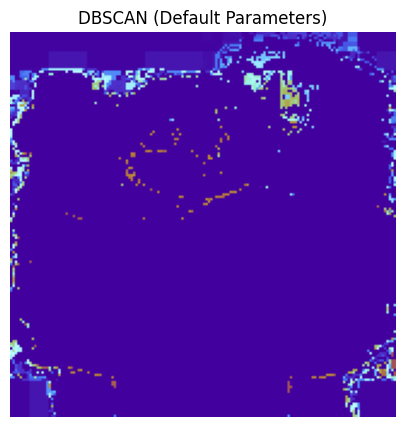

In [17]:
# Применение DBSCAN с параметрами по умолчанию
dbscan = DBSCAN()
labels = dbscan.fit_predict(pixels)

# Получение уникальных меток кластеров
unique_labels = np.unique(labels)

# Создание цветовой палитры для кластеров
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Создание нового изображения с цветами кластеров
quantized = np.zeros_like(img)
for label, color in zip(unique_labels, colors):
    mask = labels == label
    quantized[mask.reshape(img.shape[:2])] = color[:3] * 255

# Вычисление значения SSIM
ssim_value = ssim(img, quantized, channel_axis=2)

# Добавление результатов в таблицу
results_df.loc[len(results_df)] = ['DBSCAN', 'Default', ssim_value]

# Отображение результата кластеризации DBSCAN
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(cv2.cvtColor(quantized.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.title('DBSCAN (Default Parameters)')
plt.show()

In [18]:
# Вывод обновленной таблицы результатов
print(results_df)

    Model Parameters      SSIM
0  KMeans        K=2  0.524046
1  KMeans        K=5  0.671976
2  KMeans       K=10  0.775495
3  KMeans       K=20  0.849081
4  DBSCAN    Default  0.079106


   - DBSCAN с настройками по умолчанию дает крайне низкое значение SSIM (0.079106), что свидетельствует о плохом качестве кластеризации и значительном отличии кластеризованного изображения от исходного.
   - Такое низкое значение SSIM для DBSCAN может быть связано с неоптимальными настройками параметров алгоритма, таких как eps (максимальное расстояние между точками для формирования кластера) и min_samples (минимальное количество точек, необходимое для формирования кластера).

Применим алгоритм AgglomerativeClustering для кластеризации

In [19]:
from sklearn.cluster import AgglomerativeClustering

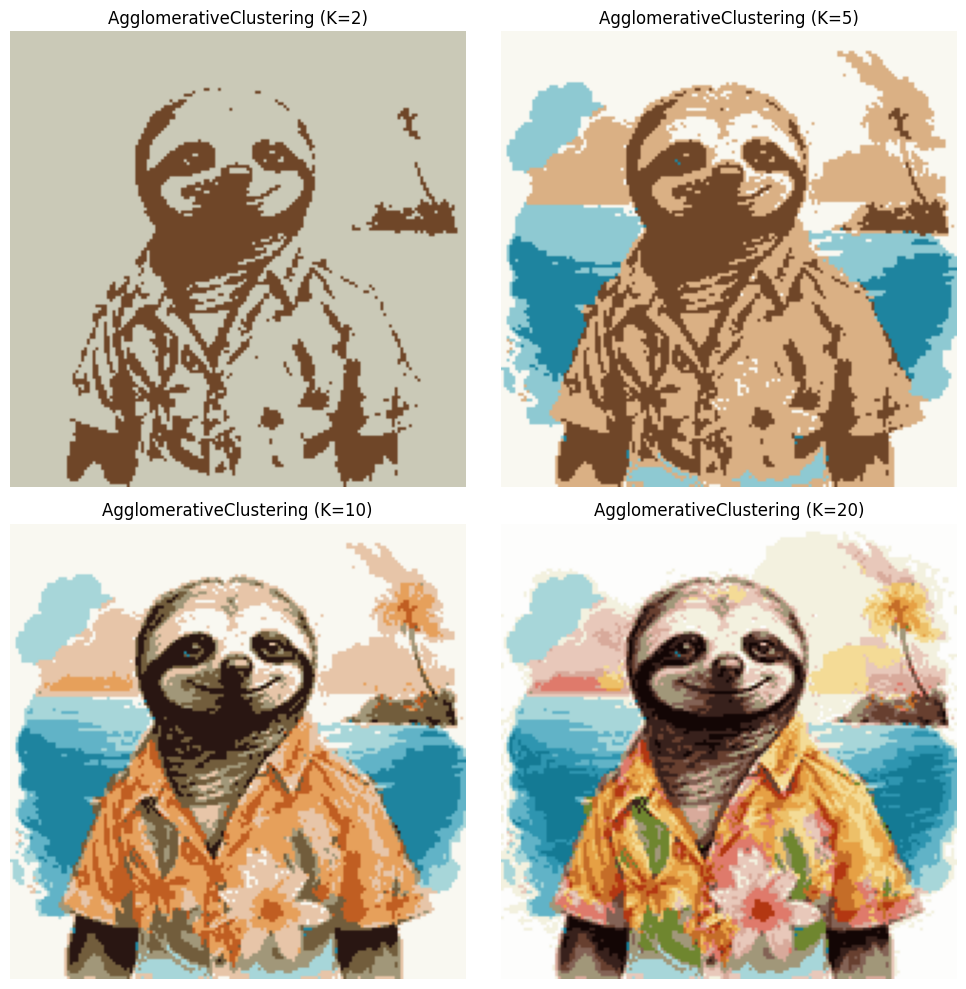

In [20]:
# Функция для применения AgglomerativeClustering и вычисления SSIM
def apply_agglomerative(n_clusters):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(pixels)
    quantized = np.zeros_like(img)
    for i in range(n_clusters):
        mask = labels == i
        quantized[mask.reshape(img.shape[:2])] = np.mean(img[mask.reshape(img.shape[:2])], axis=0)
    ssim_value = ssim(img, quantized, channel_axis=2)
    results_df.loc[len(results_df)] = ['AgglomerativeClustering', f'K={n_clusters}', ssim_value]
    return quantized

# Применение AgglomerativeClustering с разным числом кластеров
k_values = [2, 5, 10, 20]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, k in enumerate(k_values):
    quantized = apply_agglomerative(k)
    axs[i].imshow(cv2.cvtColor(quantized.astype('uint8'), cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'AgglomerativeClustering (K={k})')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [21]:
# Вывод обновленной таблицы результатов
print(results_df)

                     Model Parameters      SSIM
0                   KMeans        K=2  0.524046
1                   KMeans        K=5  0.671976
2                   KMeans       K=10  0.775495
3                   KMeans       K=20  0.849081
4                   DBSCAN    Default  0.079106
5  AgglomerativeClustering        K=2  0.494991
6  AgglomerativeClustering        K=5  0.637896
7  AgglomerativeClustering       K=10  0.761771
8  AgglomerativeClustering       K=20  0.832586


   - Алгоритмы K-means и AgglomerativeClustering демонстрируют сопоставимые значения SSIM для соответствующих чисел кластеров, что указывает на схожее качество кластеризации.
   - Однако, при увеличении числа кластеров K-means показывает немного более высокие значения SSIM по сравнению с AgglomerativeClustering. Например, при K = 20 значение SSIM для K-means составляет 0.849081, а для AgglomerativeClustering - 0.832586.
   - Это может свидетельствовать о том, что K-means обеспечивает немного лучшее структурное сходство с исходным изображением при большом числе кластеров.